# Come Visit Again
## Team Members : 
* Abhishek Tandon
* Chandrakant Sahu

# Project Overview

### Discription
TAs have collected data from Chwiggy & Yomato (restaurant sales service & review platforms)

### Evaluation
TAs are challenging us to predict the expected number of visitors to a given restaurant on given date to help the restaurants be better equipped and prepared.


### Data Description
In this competition, we are provided a time-series forecasting problem centered around restaurant visitors.<br>
The data comes from two separate sites:<br>
 -> Yomato(yom) - which uses high performance grouping (hpg) to collect and store restaurant data.<br>
 -> Chwiggy(chw) - which uses all index restaurant (air) to collect and store the restaurant data.<p>
We have use the reservations, visits, and other information from these sites to forecast future restaurant
visitor totals on a given date. The training data covers the dates from 2016 until early (first week) April 2017.
The test set covers the mid weeks (second and third weeks) of April 2017. The training and testing set both
omit days where the restaurants were closed.

<h2>File Description:</h2>
<p>This is a relational dataset from two systems. Each file is prefaced with the source (either air_ or hpg_) to indicate its origin. Each restaurant has a unique <code>chw_store_id</code> and <code>yom_store_id</code>. Note that not all restaurants are covered by both systems, and that you have been provided data beyond the restaurants for which you must forecast.</p>
<h2><strong>train.csv</strong></h2>
<p>This file contains historical visit data for the chwiggy restaurants.</p>
<ol>
<li>chw_store_id - store id with air prefix.</li>
<li>visit_date - the date</li>
<li>visitors - the number of visitors to the restaurant on the date</li>
</ol>
<h2><strong>sample_submission.csv</strong></h2>
<p>This file shows a submission in the correct format, including the days for which you must forecast.</p>
<ol>
<li>id - the id is formed by concatenating the chw_store_id and visit_date with an underscore.</li>
<li>visitors- the number of visitors forecasted for the store and date combination.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(color_codes=True)

# Chwiggy CSV Analysis

__chw_reserve__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the Chwiggy system
visit_datetime| time of the reservation
reserve_datetime | time the reservation was made
reserve_visitors | number of visitors for that reservation

In [3]:
chw_reserve = pd.read_csv('Data/come-visit-again-iiitb/chw_reserve.csv')

In [4]:
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,1/1/2016 19:00,1/1/2016 16:00,1
1,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,3
2,air_db4b38ebe7a7ceff,1/1/2016 19:00,1/1/2016 19:00,6
3,air_877f79706adbfb06,1/1/2016 20:00,1/1/2016 16:00,2
4,air_db80363d35f10926,1/1/2016 20:00,1/1/2016 1:00,5


In [5]:
from dateutil.parser import parse
print(parse(chw_reserve['visit_datetime'][4]))

2016-01-01 20:00:00


In [6]:
#parsing date time so that date time of every table/relation matches
chw_reserve['visit_datetime'] = [ parse(i) for i in chw_reserve['visit_datetime']]

In [7]:
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,1/1/2016 16:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,1/1/2016 19:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,1/1/2016 19:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,1/1/2016 16:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,1/1/2016 1:00,5


In [8]:
chw_reserve['reserve_datetime'] = [ parse(i) for i in chw_reserve['reserve_datetime']]
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [9]:
chw_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   chw_store_id      92378 non-null  object        
 1   visit_datetime    92378 non-null  datetime64[ns]
 2   reserve_datetime  92378 non-null  datetime64[ns]
 3   reserve_visitors  92378 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


* We have total 92378 rows in the table with 4 columns. 
* Visit Dates and Reserve Dates are currently object data types, which needs to be converted to __data time format__. 

In [10]:
chw_reserve.describe()

,reserve_visitors
count,92378.00
mean,4.48
std,4.92
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,100.00


* We have atleast 1 visitor for all rows. And it's obious because 0 reservation dosen't make any sence. 
* Maximum visitors count is 100 which is much higher than the mean visitors count. 
* We have data from 2016-01-01 19:00:00 and end date is 2017-05-31 21:00:00

In [11]:
#let's check if there is any null value in chw_reserve
chw_reserve.isnull().values.any()

False

There are __no null value__ in __chw_reserve__

In [12]:
print( "Number of unique restaunts in chwigge - ", len(chw_reserve['chw_store_id'].unique()))

Number of unique restaunts in chwigge -  314


In [13]:
chw_reserve["visit_year"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).year
chw_reserve["visit_month"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).month
chw_reserve["visit_weekday"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).weekday
chw_reserve["visit_date"] = pd.DatetimeIndex(chw_reserve['visit_datetime']).date
chw_reserve.head()

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,4,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,4,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,4,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,4,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,4,2016-01-01


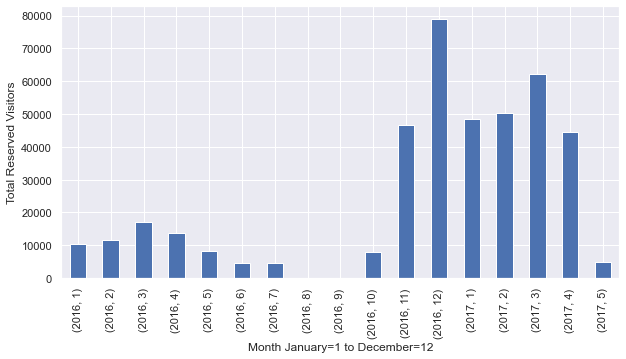

In [14]:
temp = chw_reserve.groupby(['visit_year','visit_month'])['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Month January=1 to December=12",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

* There is a certain jump in total visits after November 2016
* Missing values in Dates.

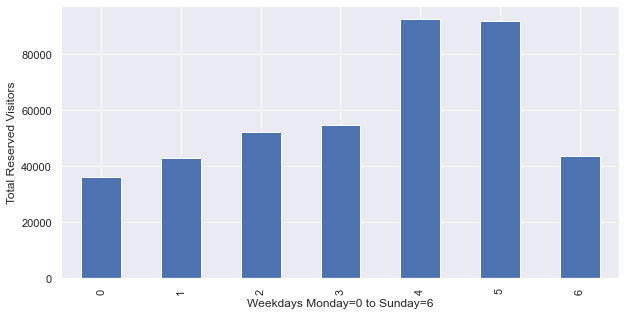

In [15]:
temp = chw_reserve.groupby('visit_weekday')['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Weekdays Monday=0 to Sunday=6",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

* There are usually more number of visitors on __Fridays and Saturdays__

# Chwiggy Store Info CSV Analysis

__chw_store_info.csv__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the air system
chw_genre_name | genre in the air system
chw_area_name | area of the restaurant in the air system
latitude | latitude
longitude | longitude

In [16]:
chw_store_info = pd.read_csv('Data/come-visit-again-iiitb/chw_store_info.csv')
chw_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chw_store_id    829 non-null    object 
 1   chw_genre_name  829 non-null    object 
 2   chw_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [17]:
chw_store_info

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.06,141.34


In [18]:
chw_store_info.isnull().values.any()

False

In [19]:
chw_store_info['chw_store_id'].duplicated().any()

False

In [20]:
print('Number of unique restaurants in the chw_store_info table : ', len(chw_store_info['chw_store_id'].unique()))

Number of unique restaurants in the chw_store_info table :  829


* chw_store_info file has __no null__ values, data is __clean__ and all chw_store_id are __unique__

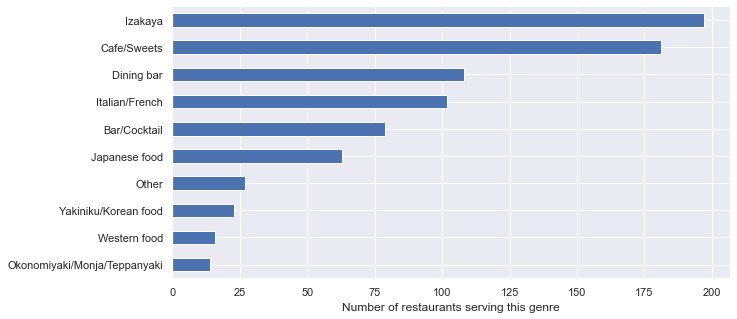

In [21]:
temp = chw_store_info['chw_genre_name'].value_counts()
temp.nlargest(10).sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants serving this genre")
plt.show()

* Above is the ordering of top 10 __popular food genres__

In [22]:
chw_store_info.chw_area_name.value_counts()

Fukuoka-ken Fukuoka-shi Daimyō           64
Tōkyō-to Shibuya-ku Shibuya              58
Tōkyō-to Minato-ku Shibakōen             51
Tōkyō-to Shinjuku-ku Kabukichō           39
Tōkyō-to Setagaya-ku Setagaya            30
                                         ..
Fukuoka-ken Kitakyūshū-shi Konyamachi     2
Tōkyō-to Taitō-ku Kuramae                 2
Tōkyō-to Shibuya-ku Jingūmae              2
Niigata-ken Kashiwazaki-shi Chūōchō       2
Tōkyō-to Shibuya-ku Higashi               2
Name: chw_area_name, Length: 103, dtype: int64

In [23]:
chw_store_info['city'] = chw_store_info['chw_area_name'].str.split().str[0]
chw_store_info['ward'] = chw_store_info['chw_area_name'].str.split().str[1]
chw_store_info['neighborhood'] = chw_store_info['chw_area_name'].str.split().str[2]
chw_store_info.head()

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude,city,ward,neighborhood
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75,Tōkyō-to,Minato-ku,Shibakōen


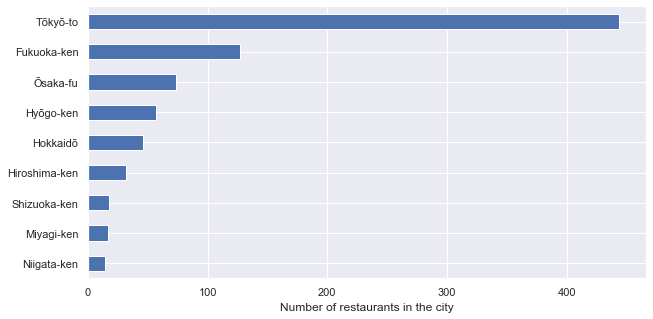

In [24]:
temp = chw_store_info['city'].value_counts()
temp.sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants in the city")
plt.show()

* City with most number of restaurants is Tokyo, Fukuoka, Osaka

# Date Info CSV Analysis

__date_info.csv__

Column Name | Column Description
-------------|:------------------
calendar_date | date
day_of_week | day of the week
holiday_flg | if the day is a holiday in Japan

In [25]:
date_info = pd.read_csv('Data/come-visit-again-iiitb/date_info.csv')
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [26]:
date_info.calendar_date = pd.to_datetime(date_info.calendar_date)

In [27]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [28]:
date_info.holiday_flg.value_counts()

0    482
1     35
Name: holiday_flg, dtype: int64

* It is not yet clear if __holiday flag__ means restaurants are closed that day, or if restaurants are open and chances are there would be more crowd on holidays
* There are __35 Holidays__ in the span of our timeseries

In [29]:
date_info.isnull().values.any()

False

* There are __no null values__ in the table.

#  Yomato Reserve CSV Analysis

__yom_reserve.csv__

Column Name | Column Description
-------------|:------------------
yom_store_id | restaurant id in the hpg system
visit_datetime| time of the reservation
reserve_datetime | time the reservation was made
reserve_visitors | number of visitors for that reservation

In [30]:
yom_reserve = pd.read_csv('Data/come-visit-again-iiitb/yom_reserve.csv')

In [31]:
yom_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   yom_store_id      1048575 non-null  object
 1   visit_datetime    1048575 non-null  object
 2   reserve_datetime  1048575 non-null  object
 3   reserve_visitors  1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


* We have total __1048575__ rows in the table with 4 columns. 
* Visit Dates and Reserve Dates are currently object data types, which needs to be converted to __data time format__. 

In [32]:
#Reimporting the yom_reserve csv using pandas inbuilt date time format parsing.
yom_reserve = pd.read_csv('Data/come-visit-again-iiitb/yom_reserve.csv',parse_dates=['visit_datetime', 'reserve_datetime'])

In [33]:
yom_reserve

,yom_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
...,...,...,...,...
1048570,hpg_c20d81d9cb17891b,2016-11-30 12:00:00,2016-11-27 15:00:00,2
1048571,hpg_c89a6b67db37d5f8,2016-11-30 12:00:00,2016-11-28 18:00:00,10
1048572,hpg_ccdd56aafb8ebc9a,2016-11-30 12:00:00,2016-11-26 13:00:00,3
1048573,hpg_cd658dcb7253e28a,2016-11-30 12:00:00,2016-11-29 16:00:00,2


In [34]:
yom_reserve.visit_datetime.is_monotonic

True

In [35]:
yom_reserve.describe()

,reserve_visitors
count,1048575.00
mean,4.89
std,5.09
min,1.00
25%,2.00
50%,3.00
75%,6.00
max,100.00


* We have atleast 1 reserved visitor for all rows. 
* Maximum visitors count is much higher than the mean visitors count. 
* We have data from 2016-01-01 11:00:00 to 2016-11-25 18:00:00

In [36]:
print('Number of unique restaurants in the yom_reserve table : ', len(yom_reserve['yom_store_id'].unique()))

Number of unique restaurants in the yom_reserve table :  12721


In [37]:
yom_reserve["visit_year"] = pd.DatetimeIndex(yom_reserve['visit_datetime']).year
yom_reserve["visit_month"] = pd.DatetimeIndex(yom_reserve['visit_datetime']).month
yom_reserve["visit_weekday"] = pd.DatetimeIndex(yom_reserve['visit_datetime']).weekday
yom_reserve["visit_date"] = pd.DatetimeIndex(yom_reserve['visit_datetime']).date
yom_reserve.head()

,yom_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016,1,4,2016-01-01
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016,1,4,2016-01-01
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016,1,4,2016-01-01
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016,1,4,2016-01-01
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016,1,4,2016-01-01


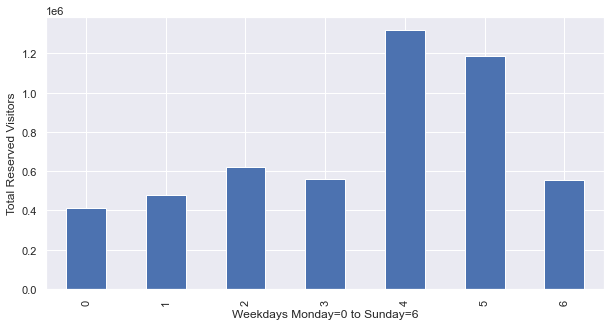

In [38]:
temp = yom_reserve.groupby('visit_weekday')['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Weekdays Monday=0 to Sunday=6",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

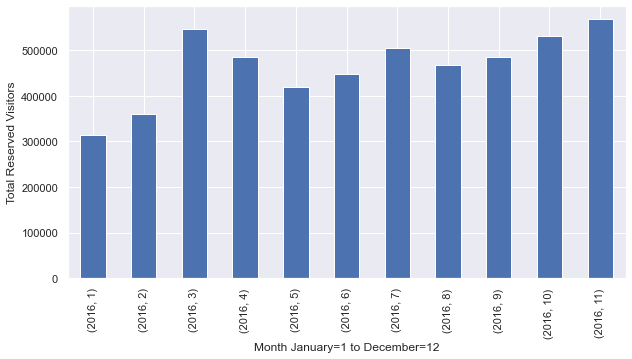

In [39]:
temp = yom_reserve.groupby(['visit_year','visit_month'])['reserve_visitors'].sum()
temp.plot(kind='bar',xlabel = "Month January=1 to December=12",ylabel="Total Reserved Visitors",figsize=(10,5))
plt.show()

# Yomato Store Info

__yom_store_info.csv__

Column Name | Column Description
-------------|:------------------
yom_store_id | restaurant id in the yom system
yom_genre_name | genre in the yom system
yom_area_name | area of the restaurant in the yom system
latitude | latitude
longitude | longitude


In [40]:
yom_store_info = pd.read_csv('Data/come-visit-again-iiitb/yom_store_info.csv')

In [41]:
yom_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yom_store_id    4690 non-null   object 
 1   yom_genre_name  4690 non-null   object 
 2   yom_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [42]:
yom_store_info

,yom_store_id,yom_genre_name,yom_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67
...,...,...,...,...,...
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.70,139.77
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.67,139.73
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.70,139.77
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.73,139.71


In [43]:
yom_store_info.isnull().values.any()

False

In [44]:
yom_store_info.isnull().values.any()

False

In [45]:
print('Number of unique restaurants in the hpg_store_info table : ', len(yom_store_info['yom_store_id'].unique()))

Number of unique restaurants in the hpg_store_info table :  4690


* hpg_store_info file has __no null__ values, data is __clean__ and all hpg_store_id are __unique__

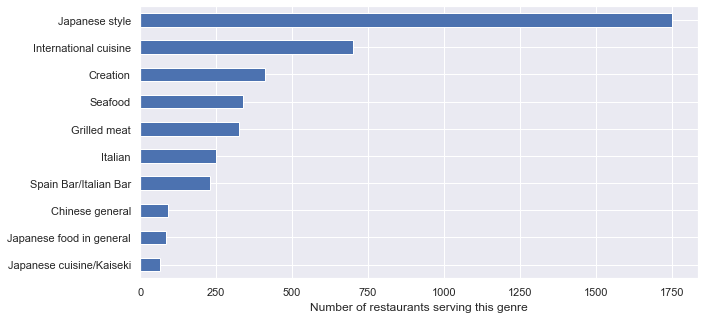

In [46]:
temp = yom_store_info['yom_genre_name'].value_counts()
temp.nlargest(10).sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants serving this genre")
plt.show()

* Above is the ordering of top 10 __popular food genres__

In [47]:
yom_store_info.yom_area_name.value_counts()

Tōkyō-to Shinjuku-ku None              257
Tōkyō-to Chūō-ku Ginza                 198
Hyōgo-ken Kōbe-shi None                163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji    150
Osaka Prefecture Osaka None            145
                                      ... 
Niigata-ken Shibata-shi Miyukichō        2
Tōkyō-to Shinagawa-ku Koyama             1
Ōsaka-fu Minoo-shi Hanjo                 1
Niigata-ken Nagaoka-shi Rokusho          1
Hokkaidō Ashibetsu-shi None              1
Name: yom_area_name, Length: 119, dtype: int64

In [48]:
yom_store_info['city'] = yom_store_info['yom_area_name'].str.split().str[0]
yom_store_info['ward'] = yom_store_info['yom_area_name'].str.split().str[1]
yom_store_info['neighborhood'] = yom_store_info['yom_area_name'].str.split().str[2]
yom_store_info.head()

,yom_store_id,yom_genre_name,yom_area_name,latitude,longitude,city,ward,neighborhood
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō


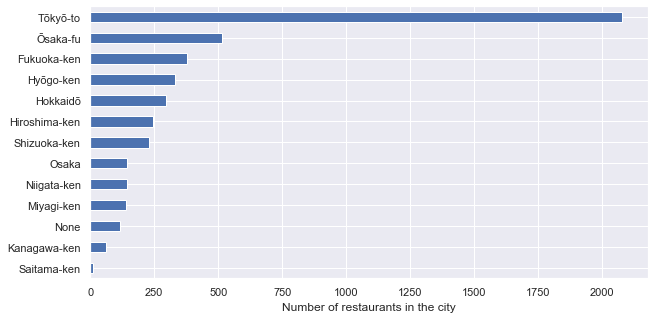

In [49]:
temp = yom_store_info['city'].value_counts()
temp.sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of restaurants in the city")
plt.show()

* City with most number of restaurants is Tokyo, Fukuoka, Osaka

# Store ID Relation

__store_id_relation.csv__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the chw system
yom_store_id | restaurant id in the yom system

In [50]:
store_id_relation = pd.read_csv('Data/come-visit-again-iiitb/store_id_relation.csv')
store_id_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   chw_store_id  150 non-null    object
 1   yom_store_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [51]:
store_id_relation

,chw_store_id,yom_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
...,...,...
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19


* Store ID relation table contains mapping of restaurant names in AIR and HPG system
* Point to be noted here is, that this relation has only 150 entries. And number of AIR / HPG restaurants are much more than that. So we'll have to be careful while merging these two. 

In [52]:
store_id_relation.isnull().values.any()

False

In [53]:
print('Number of unique chw_store_id in table : ', len(store_id_relation['chw_store_id'].unique()))
print('Number of unique yom_store_id in table : ', len(store_id_relation['yom_store_id'].unique()))

Number of unique chw_store_id in table :  150
Number of unique yom_store_id in table :  150


* Just to verify if there are no inconsistent mappings.

# Train CSV

__train.csv__

Column Name | Column Description
-------------|:------------------
chw_store_id | restaurant id in the chw system
visit_date | date
visitors | the number of visitors to the restaurant on the date

In [54]:
train = pd.read_csv('Data/come-visit-again-iiitb/train.csv')

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215705 entries, 0 to 215704
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   chw_store_id  215705 non-null  object
 1   visit_date    215705 non-null  object
 2   visitors      215705 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [56]:
train = pd.read_csv('Data/come-visit-again-iiitb/train.csv',parse_dates=['visit_date'])

In [57]:
train.head()

,chw_store_id,visit_date,visitors
0,air_3561fd1c0bce6a95,2016-08-25,8
1,air_26c5bbeb7bb82bf1,2017-01-11,9
2,air_c1ff20617c54fee7,2016-08-10,13
3,air_310e467e6e625004,2017-03-10,17
4,air_671b4bea84dafb67,2016-06-01,34


In [58]:
print('Number of unique restaurants in the training data : ', len(train['chw_store_id'].unique()))

Number of unique restaurants in the training data :  829


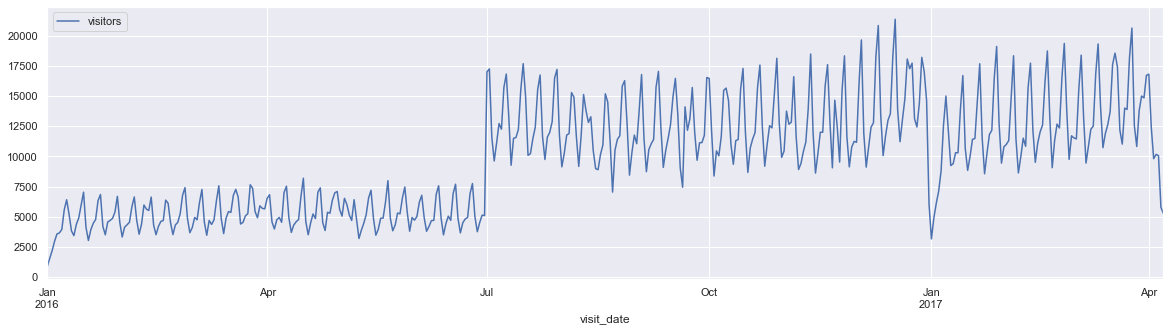

In [59]:
train.groupby('visit_date').sum().plot(figsize=(20,5))
plt.show()

In [60]:
train.isnull().values.any()

False

* There are no null values in training data

In [61]:
pd.Series(list(set(train.chw_store_id).intersection(set(store_id_relation.chw_store_id))))

0      air_4cca5666eaf5c709
1      air_84f6876ff7e83ae7
2      air_9ca2767761efff4d
3      air_4570f52104fe0982
4      air_e657ca554b0c008c
               ...         
145    air_68301bcb11e2f389
146    air_627cabe2fe53f33f
147    air_32460819c7600037
148    air_3e93f3c81008696d
149    air_fdc02ec4a3d21ea4
Length: 150, dtype: object

In [62]:
pd.Series(list(set(chw_store_info.chw_store_id).intersection(set(store_id_relation.chw_store_id))))

0      air_4cca5666eaf5c709
1      air_84f6876ff7e83ae7
2      air_9ca2767761efff4d
3      air_4570f52104fe0982
4      air_e657ca554b0c008c
               ...         
145    air_68301bcb11e2f389
146    air_627cabe2fe53f33f
147    air_32460819c7600037
148    air_3e93f3c81008696d
149    air_fdc02ec4a3d21ea4
Length: 150, dtype: object

In [63]:
pd.Series(list(set(chw_store_info.chw_store_id).intersection(set(train.chw_store_id))))

0      air_6108821ffafa9b72
1      air_e657ca554b0c008c
2      air_00a91d42b08b08d9
3      air_e0aee25b56a069f2
4      air_6d65542aa43b598b
               ...         
824    air_0b9038300f8b2b50
825    air_1653a6c513865af3
826    air_63a750d8b4b6a976
827    air_9a6f6e7f623003d2
828    air_a2b29aa7feb4e36f
Length: 829, dtype: object

* As our training data contains all the chw_store_id that are present in store_id_relation, we would need to merge all yom data from yom_reserve corresponding to these chw_store_id in chw_reserve data.

# Sample Submission CSV

In [64]:
sample_submission = pd.read_csv('Data/come-visit-again-iiitb/sample_submission.csv')

In [65]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23968 entries, 0 to 23967
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        23968 non-null  object
 1   visitors  23968 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 374.6+ KB


In [66]:
sample_submission

,id,visitors
0,air_e7d2ac6d53d1b744_12/9/2016,0
1,air_55c3627912b9c849_2/1/2016,0
2,air_d1418d6fd6d634f2_9/16/2016,0
3,air_88ca84051ba95339_1/19/2016,0
4,air_4d71826793c09b22_1/10/2017,0
...,...,...
23963,air_f6cdaf7b7fdc6d78_1/25/2017,0
23964,air_04cae7c1bc9b2a0b_12/5/2016,0
23965,air_dea0655f96947922_12/21/2016,0
23966,air_e270aff84ac7e4c8_9/2/2016,0


In [67]:
#Extracting air store id from sample submission and checking if all id are present in our training data set.
pd.DataFrame(sample_submission.id.str.rsplit('_',1))['id'].str[0].isin(train.chw_store_id).all()

True

* All the air store id present in Sample Submission csv are present in Training data
* This means we have data to predict visitors for every restaurant in sample submission and there are no missing restaurants in training set or metadata

## Next task is to merge the metadata with the training data set, and to collectively analyse the information (EDA) and identifying important features to keep for training a model

General intuition for important features that might be useful for prediction : 
* Month, weekday
* Type of cuisine genre served by restaurant (Genre)
* City / Area / Ward
* holiday flag
* Number of reservations made in advance vs number of actual visitors

In [68]:
chw_reserve

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,4,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016,1,4,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016,1,4,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,4,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016,1,4,2016-01-01
...,...,...,...,...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,2017,5,0,2017-05-29
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,2017,5,1,2017-05-30
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,2017,5,2,2017-05-31
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,2017,5,2,2017-05-31


In [69]:
yom_reserve

,yom_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016,1,4,2016-01-01
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016,1,4,2016-01-01
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016,1,4,2016-01-01
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016,1,4,2016-01-01
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016,1,4,2016-01-01
...,...,...,...,...,...,...,...,...
1048570,hpg_c20d81d9cb17891b,2016-11-30 12:00:00,2016-11-27 15:00:00,2,2016,11,2,2016-11-30
1048571,hpg_c89a6b67db37d5f8,2016-11-30 12:00:00,2016-11-28 18:00:00,10,2016,11,2,2016-11-30
1048572,hpg_ccdd56aafb8ebc9a,2016-11-30 12:00:00,2016-11-26 13:00:00,3,2016,11,2,2016-11-30
1048573,hpg_cd658dcb7253e28a,2016-11-30 12:00:00,2016-11-29 16:00:00,2,2016,11,2,2016-11-30


In [70]:
chw_store_info

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude,city,ward,neighborhood
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75,Tōkyō-to,Minato-ku,Shibakōen
...,...,...,...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70,Tōkyō-to,Shibuya-ku,Shibuya
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70,Tōkyō-to,Shibuya-ku,Shibuya
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70,Tōkyō-to,Shibuya-ku,Shibuya
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.06,141.34,Hokkaidō,Sapporo-shi,Minami


In [71]:
yom_store_info

,yom_store_id,yom_genre_name,yom_area_name,latitude,longitude,city,ward,neighborhood
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.64,139.67,Tōkyō-to,Setagaya-ku,Taishidō
...,...,...,...,...,...,...,...,...
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.70,139.77,Tōkyō-to,Chiyoda-ku,None
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.67,139.73,Tōkyō-to,Minato-ku,Roppongi
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.70,139.77,Tōkyō-to,Chiyoda-ku,None
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.73,139.71,Tōkyō-to,Toshima-ku,None


In [72]:
store_id_relation

,chw_store_id,yom_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
...,...,...
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19


In [73]:
date_info

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


In [74]:
train

,chw_store_id,visit_date,visitors
0,air_3561fd1c0bce6a95,2016-08-25,8
1,air_26c5bbeb7bb82bf1,2017-01-11,9
2,air_c1ff20617c54fee7,2016-08-10,13
3,air_310e467e6e625004,2017-03-10,17
4,air_671b4bea84dafb67,2016-06-01,34
...,...,...,...
215700,air_e053c561f32acc28,2016-07-20,27
215701,air_74cf22153214064c,2016-12-06,3
215702,air_287d2de7d3c93406,2016-12-20,24
215703,air_2570ccb93badde68,2016-07-06,28


In [75]:
sample_submission = pd.read_csv('Data/come-visit-again-iiitb/sample_submission.csv')

In [76]:
#dropping the day of week column as we would already extract it from datetime value.
date_info.drop(columns=['day_of_week'],inplace=True)

In [77]:
#renaming date column so that it will be useful while merging the holiday flag with training data.
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)
date_info

,visit_date,holiday_flg
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,1
3,2016-01-04,0
4,2016-01-05,0
...,...,...
512,2017-05-27,0
513,2017-05-28,0
514,2017-05-29,0
515,2017-05-30,0


In [78]:
#Adding chw_store_id column and performing inner join to discard those rows which does not have chw_store_id associated with it.
yom_reserve_storeinfo = yom_reserve.merge(store_id_relation, how='inner',on='yom_store_id')
yom_reserve_storeinfo

,yom_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date,chw_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,2016,1,4,2016-01-01,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,2016,1,5,2016-01-02,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,2016,1,6,2016-01-03,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,2016,1,2,2016-01-06,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,2016,1,0,2016-01-11,air_db80363d35f10926
...,...,...,...,...,...,...,...,...,...
16110,hpg_0f78ef8d1e4b23d8,2016-11-22 19:00:00,2016-11-16 02:00:00,2,2016,11,1,2016-11-22,air_84f6876ff7e83ae7
16111,hpg_0f78ef8d1e4b23d8,2016-11-23 19:00:00,2016-11-21 18:00:00,4,2016,11,2,2016-11-23,air_84f6876ff7e83ae7
16112,hpg_0f78ef8d1e4b23d8,2016-11-25 19:00:00,2016-11-21 18:00:00,4,2016,11,4,2016-11-25,air_84f6876ff7e83ae7
16113,hpg_0f78ef8d1e4b23d8,2016-11-29 19:00:00,2016-11-24 00:00:00,2,2016,11,1,2016-11-29,air_84f6876ff7e83ae7


In [79]:
#Adjusting the columns and making it align with chw_reserve table so that it can be appended later.
yom_reserve_storeinfo = yom_reserve_storeinfo[['chw_store_id','visit_datetime','reserve_datetime','reserve_visitors']]
yom_reserve_storeinfo

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 15:00:00,4
1,air_db80363d35f10926,2016-01-02 19:00:00,2016-01-02 14:00:00,2
2,air_db80363d35f10926,2016-01-03 18:00:00,2016-01-02 20:00:00,6
3,air_db80363d35f10926,2016-01-06 20:00:00,2016-01-04 22:00:00,3
4,air_db80363d35f10926,2016-01-11 18:00:00,2016-01-11 14:00:00,2
...,...,...,...,...
16110,air_84f6876ff7e83ae7,2016-11-22 19:00:00,2016-11-16 02:00:00,2
16111,air_84f6876ff7e83ae7,2016-11-23 19:00:00,2016-11-21 18:00:00,4
16112,air_84f6876ff7e83ae7,2016-11-25 19:00:00,2016-11-21 18:00:00,4
16113,air_84f6876ff7e83ae7,2016-11-29 19:00:00,2016-11-24 00:00:00,2


In [80]:
#Merging Chw reservation data and Yomato reservation data for all chw_store_id that are available in both tables.
#This is basically appending the yom data after chw data. Because each reservation is done separately, we'll combine
#it date wise later.
reservations = chw_reserve.append(yom_reserve_storeinfo)
reservations

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016.00,1.00,4.00,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016.00,1.00,4.00,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016.00,1.00,4.00,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016.00,1.00,4.00,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016.00,1.00,4.00,2016-01-01
...,...,...,...,...,...,...,...,...
16110,air_84f6876ff7e83ae7,2016-11-22 19:00:00,2016-11-16 02:00:00,2,NaN,NaN,NaN,NaN
16111,air_84f6876ff7e83ae7,2016-11-23 19:00:00,2016-11-21 18:00:00,4,NaN,NaN,NaN,NaN
16112,air_84f6876ff7e83ae7,2016-11-25 19:00:00,2016-11-21 18:00:00,4,NaN,NaN,NaN,NaN
16113,air_84f6876ff7e83ae7,2016-11-29 19:00:00,2016-11-24 00:00:00,2,NaN,NaN,NaN,NaN


In [81]:
#Time of booking and time of reservation.
reservations["visit_date"] = pd.DatetimeIndex(reservations['visit_datetime']).date
reservations["visit_time"] = pd.DatetimeIndex(reservations['visit_datetime']).hour
reservations["reserve_time"] = pd.DatetimeIndex(reservations['reserve_datetime']).hour 

#Time difference between planned visit time and booking time.
reservations["Time_Difference"] = (reservations['visit_datetime'] - reservations['reserve_datetime']).dt.seconds / 3600
reservations

,chw_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_year,visit_month,visit_weekday,visit_date,visit_time,reserve_time,Time_Difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016.00,1.00,4.00,2016-01-01,19,16,3.00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016.00,1.00,4.00,2016-01-01,19,19,0.00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016.00,1.00,4.00,2016-01-01,19,19,0.00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016.00,1.00,4.00,2016-01-01,20,16,4.00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016.00,1.00,4.00,2016-01-01,20,1,19.00
...,...,...,...,...,...,...,...,...,...,...,...
16110,air_84f6876ff7e83ae7,2016-11-22 19:00:00,2016-11-16 02:00:00,2,NaN,NaN,NaN,2016-11-22,19,2,17.00
16111,air_84f6876ff7e83ae7,2016-11-23 19:00:00,2016-11-21 18:00:00,4,NaN,NaN,NaN,2016-11-23,19,18,1.00
16112,air_84f6876ff7e83ae7,2016-11-25 19:00:00,2016-11-21 18:00:00,4,NaN,NaN,NaN,2016-11-25,19,18,1.00
16113,air_84f6876ff7e83ae7,2016-11-29 19:00:00,2016-11-24 00:00:00,2,NaN,NaN,NaN,2016-11-29,19,0,19.00


In [82]:
#Grouping the reservations by air_store_id and date columns because training dataset contains visitors for a 
#restaurant for respective dates.
reservations_by_date = reservations[['chw_store_id','visit_date','reserve_visitors']].groupby(['chw_store_id','visit_date'],as_index=False).sum()

#Taking the mean of time difference, visit time and reserve time grouped by store id and date.
reservations_by_date['Time_Difference'] = reservations[['chw_store_id','visit_date','Time_Difference',]].groupby(['chw_store_id','visit_date'],as_index=False).mean()['Time_Difference']
reservations_by_date['visit_time']= reservations[['chw_store_id','visit_date','visit_time',]].groupby(['chw_store_id','visit_date'],as_index=False).mean()['visit_time']
reservations_by_date['reserve_time']= reservations[['chw_store_id','visit_date','reserve_time',]].groupby(['chw_store_id','visit_date'],as_index=False).mean()['reserve_time']
reservations_by_date.visit_date = pd.to_datetime(reservations_by_date.visit_date)

reservations_by_date

,chw_store_id,visit_date,reserve_visitors,Time_Difference,visit_time,reserve_time
0,air_00a91d42b08b08d9,2016-01-14,2,5.00,19.00,14.00
1,air_00a91d42b08b08d9,2016-01-15,4,22.00,18.00,20.00
2,air_00a91d42b08b08d9,2016-01-16,2,22.00,18.00,20.00
3,air_00a91d42b08b08d9,2016-01-22,2,10.00,18.00,8.00
4,air_00a91d42b08b08d9,2016-01-29,5,0.00,18.00,18.00
...,...,...,...,...,...,...
39679,air_fea5dc9594450608,2017-04-22,2,3.00,22.00,19.00
39680,air_fea5dc9594450608,2017-04-25,2,20.00,18.00,22.00
39681,air_fea5dc9594450608,2017-04-28,3,0.00,19.00,19.00
39682,air_fea5dc9594450608,2017-05-20,6,21.00,19.00,22.00


In [83]:
#adding store info to the training dataset from chw_store_info table as it contains data for all the air stores.
train_temp = train.merge(chw_store_info, how='left', on='chw_store_id')

In [84]:
#preparing final training dataset by merging reservation data to the train data.
train_data = train_temp.merge(reservations_by_date,how='left',on=['chw_store_id','visit_date'])

#As we would have many null values, because most of the restaurants in training data set does not have reservation data.
train_data.fillna(value=0,inplace=True)

#We do not require latitude longitude information as we extracted the city ward and neighborhood.
train_data.drop(columns=['latitude','longitude'],inplace=True)

#Extracting year month weekday as new features
train_data["visit_year"] = pd.DatetimeIndex(train_data['visit_date']).year
train_data["visit_month"] = pd.DatetimeIndex(train_data['visit_date']).month
train_data["visit_weekday"] = pd.DatetimeIndex(train_data['visit_date']).weekday

#Extracting city ward neighbourhood as new features
train_data['city'] = train_data['chw_area_name'].str.split().str[0]
train_data['ward'] = train_data['chw_area_name'].str.split().str[1]
train_data['neighborhood'] = train_data['chw_area_name'].str.split().str[2]

#Add holiday flag from date info table
train_data = train_data.merge(date_info,how='left',on='visit_date')

#Making all object type columns as categorical columns so that it may help in plotting.
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].astype('category')

train_data

,chw_store_id,visit_date,visitors,chw_genre_name,chw_area_name,city,ward,neighborhood,reserve_visitors,Time_Difference,visit_time,reserve_time,visit_year,visit_month,visit_weekday,holiday_flg
0,air_3561fd1c0bce6a95,2016-08-25,8,Italian/French,Tōkyō-to Ōta-ku Kamiikedai,Tōkyō-to,Ōta-ku,Kamiikedai,0.00,0.00,0.00,0.00,2016,8,3,0
1,air_26c5bbeb7bb82bf1,2017-01-11,9,Cafe/Sweets,Tōkyō-to Kita-ku Ōjihonchō,Tōkyō-to,Kita-ku,Ōjihonchō,0.00,0.00,0.00,0.00,2017,1,2,0
2,air_c1ff20617c54fee7,2016-08-10,13,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,Tōkyō-to,Meguro-ku,Kamimeguro,0.00,0.00,0.00,0.00,2016,8,2,0
3,air_310e467e6e625004,2017-03-10,17,Italian/French,Tōkyō-to Chūō-ku Tsukiji,Tōkyō-to,Chūō-ku,Tsukiji,0.00,0.00,0.00,0.00,2017,3,4,0
4,air_671b4bea84dafb67,2016-06-01,34,Japanese food,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to,Minato-ku,Shibakōen,0.00,0.00,0.00,0.00,2016,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215700,air_e053c561f32acc28,2016-07-20,27,Izakaya,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō,Asahikawa-shi,6,0.00,0.00,0.00,0.00,2016,7,2,0
215701,air_74cf22153214064c,2016-12-06,3,Cafe/Sweets,Hyōgo-ken Takarazuka-shi Tōyōchō,Hyōgo-ken,Takarazuka-shi,Tōyōchō,0.00,0.00,0.00,0.00,2016,12,1,0
215702,air_287d2de7d3c93406,2016-12-20,24,Bar/Cocktail,Tōkyō-to Toshima-ku Minamiikebukuro,Tōkyō-to,Toshima-ku,Minamiikebukuro,0.00,0.00,0.00,0.00,2016,12,1,0
215703,air_2570ccb93badde68,2016-07-06,28,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,Tōkyō-to,Shinjuku-ku,Kabukichō,0.00,0.00,0.00,0.00,2016,7,2,0


In [85]:
train_data.columns

Index(['chw_store_id', 'visit_date', 'visitors', 'chw_genre_name',
       'chw_area_name', 'city', 'ward', 'neighborhood', 'reserve_visitors',
       'Time_Difference', 'visit_time', 'reserve_time', 'visit_year',
       'visit_month', 'visit_weekday', 'holiday_flg'],
      dtype='object')

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215705 entries, 0 to 215704
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   chw_store_id      215705 non-null  category      
 1   visit_date        215705 non-null  datetime64[ns]
 2   visitors          215705 non-null  int64         
 3   chw_genre_name    215705 non-null  category      
 4   chw_area_name     215705 non-null  category      
 5   city              215705 non-null  category      
 6   ward              215705 non-null  category      
 7   neighborhood      215705 non-null  category      
 8   reserve_visitors  215705 non-null  float64       
 9   Time_Difference   215705 non-null  float64       
 10  visit_time        215705 non-null  float64       
 11  reserve_time      215705 non-null  float64       
 12  visit_year        215705 non-null  int64         
 13  visit_month       215705 non-null  int64         
 14  visi

In [87]:
#Converting numeric values into categories so that encodings can be applied later.
for col in ['visit_year','visit_month','visit_weekday','holiday_flg']:
    train_data[col] = train_data[col].astype('category')

In [88]:
train_data.sort_values(by='visit_date').head()

,chw_store_id,visit_date,visitors,chw_genre_name,chw_area_name,city,ward,neighborhood,reserve_visitors,Time_Difference,visit_time,reserve_time,visit_year,visit_month,visit_weekday,holiday_flg
142281,air_536043fcf1a4f8a4,2016-01-01,42,Bar/Cocktail,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,Ōsaka-fu,Ōsaka-shi,Kyūtarōmachi,0.00,0.00,0.00,0.00,2016,1,4,1
140067,air_04341b588bde96cd,2016-01-01,10,Izakaya,Tōkyō-to Nerima-ku Toyotamakita,Tōkyō-to,Nerima-ku,Toyotamakita,0.00,0.00,0.00,0.00,2016,1,4,1
8107,air_36bcf77d3382d36e,2016-01-01,34,Bar/Cocktail,Tōkyō-to Chiyoda-ku Kudanminami,Tōkyō-to,Chiyoda-ku,Kudanminami,0.00,0.00,0.00,0.00,2016,1,4,1
107896,air_9d452a881f7f2bb7,2016-01-01,1,Italian/French,Fukuoka-ken Fukuoka-shi Hakata Ekimae,Fukuoka-ken,Fukuoka-shi,Hakata,0.00,0.00,0.00,0.00,2016,1,4,1
95718,air_09a845d5b5944b01,2016-01-01,56,Izakaya,Fukuoka-ken Kurume-shi Jōnanmachi,Fukuoka-ken,Kurume-shi,Jōnanmachi,0.00,0.00,0.00,0.00,2016,1,4,1


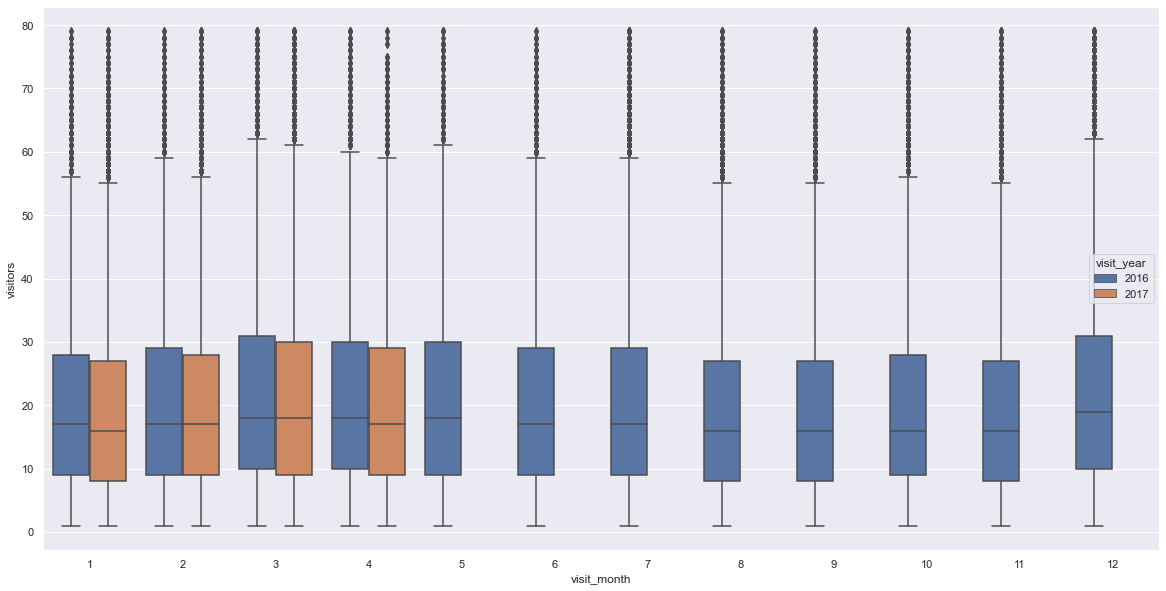

In [89]:
plt.figure(figsize=(20,10))
sns.boxplot(y='visitors',x='visit_month',data=train_data[(train_data.visitors < 80)],hue='visit_year')
plt.show()


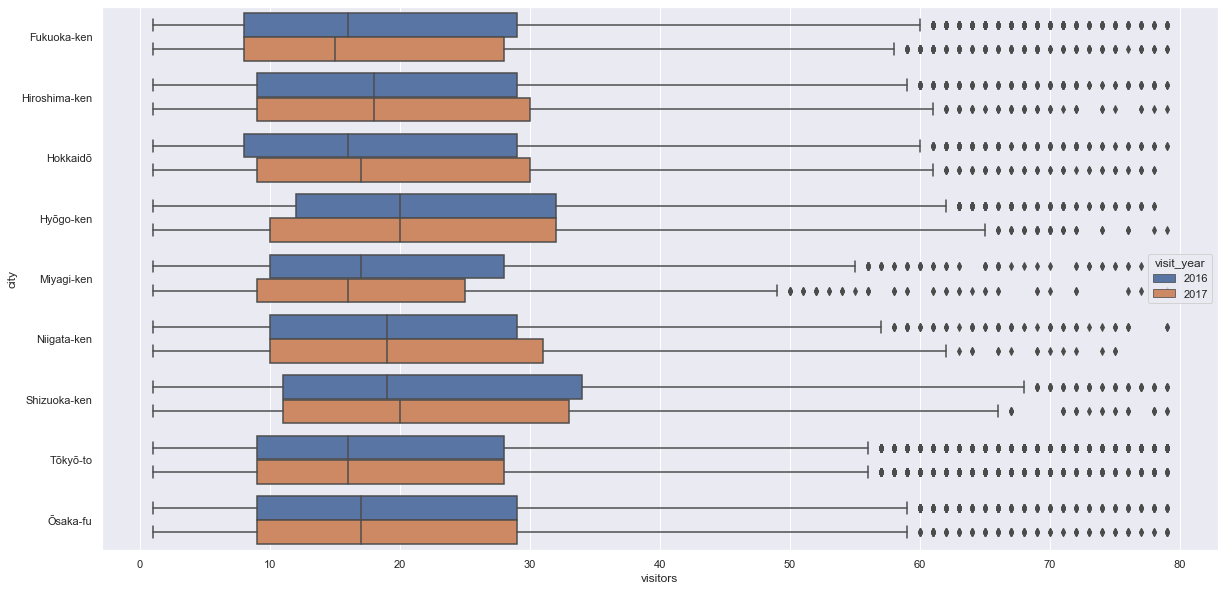

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='city',data=train_data[(train_data.visitors < 80)],hue='visit_year')
plt.show()

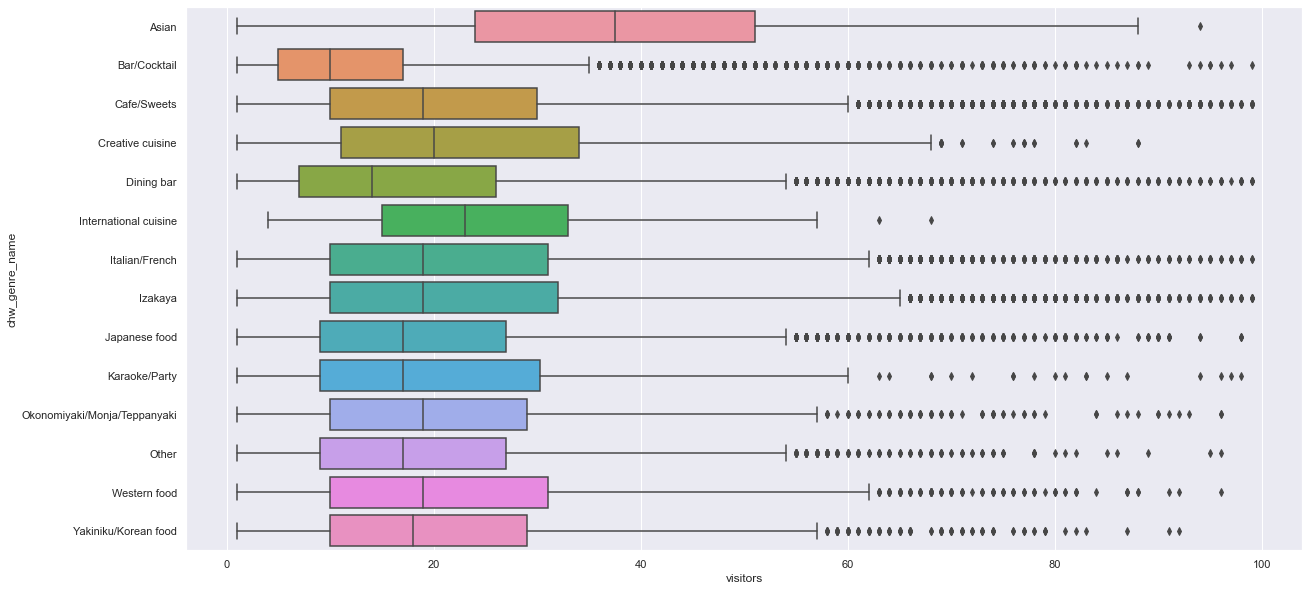

In [91]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='chw_genre_name',data=train_data[(train_data.visitors < 100)])
plt.show()

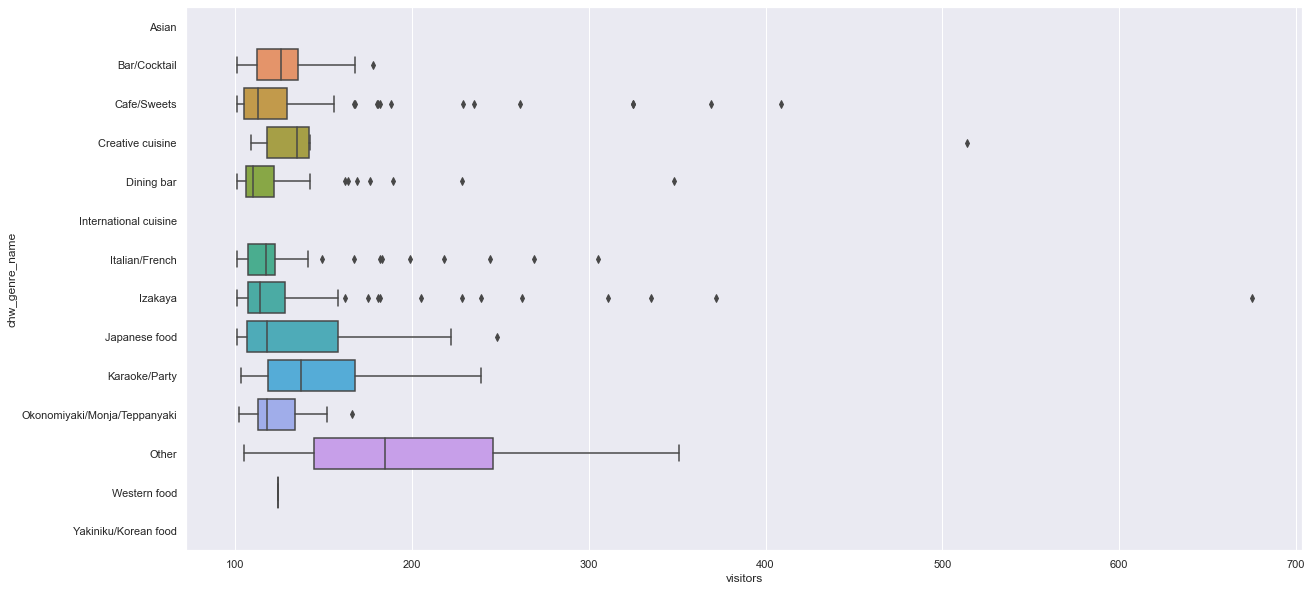

In [92]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='chw_genre_name',data=train_data[(train_data.visitors > 100)])
plt.show()

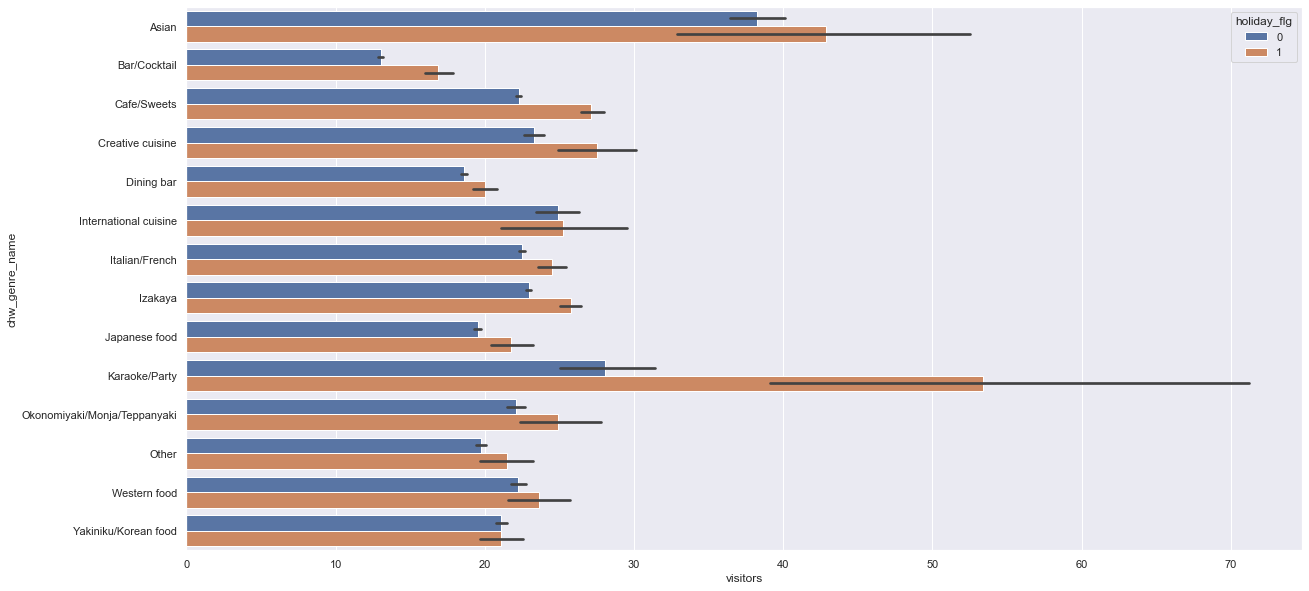

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x='visitors',y='chw_genre_name',data=train_data,hue='holiday_flg')
plt.show()

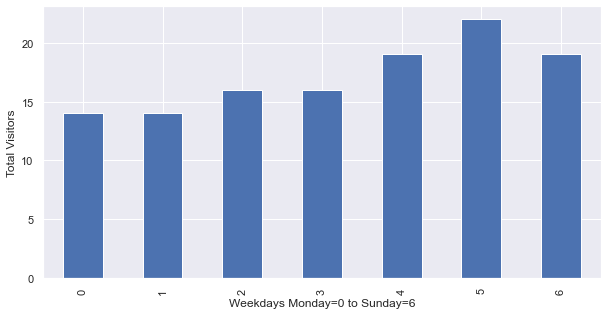

In [94]:
temp = train_data.groupby('visit_weekday')['visitors'].median()
temp.plot(kind='bar',xlabel = "Weekdays Monday=0 to Sunday=6",ylabel="Total Visitors",figsize=(10,5))
plt.show()

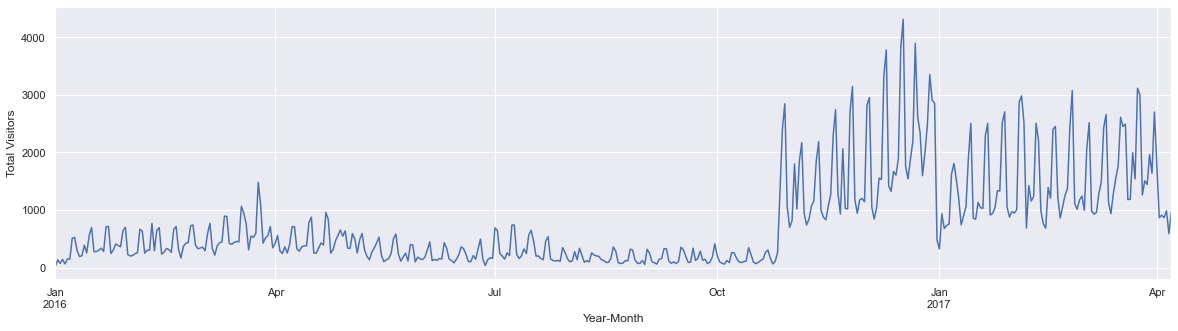

In [95]:
temp = train_data.groupby('visit_date')['reserve_visitors'].sum()
temp.plot(kind='line',xlabel="Year-Month",ylabel="Total Visitors",figsize=(20,5))
plt.show()

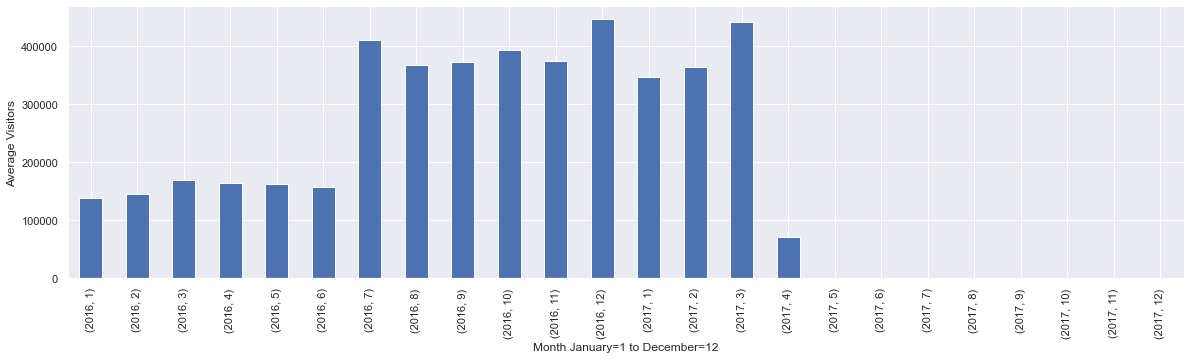

In [96]:
temp = train_data.groupby(['visit_year','visit_month'])['visitors'].sum()
temp.plot(kind='bar',xlabel = "Month January=1 to December=12",ylabel="Average Visitors",figsize=(20,5))
plt.show()

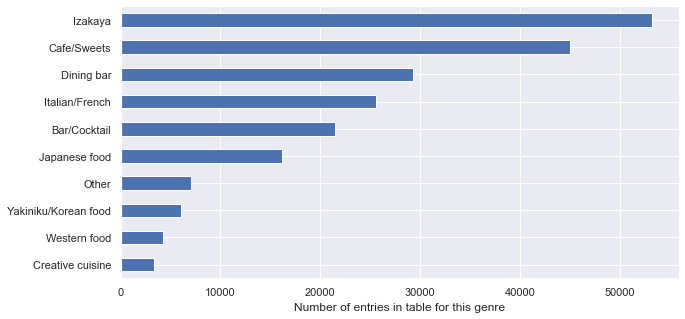

In [97]:
temp = train_data['chw_genre_name'].value_counts()
temp.nlargest(10).sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of entries in table for this genre")
plt.show()

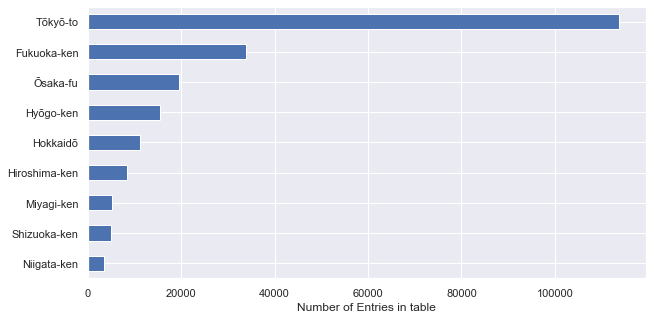

In [98]:
temp = train_data['city'].value_counts()
temp.sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of Entries in table")
plt.show()

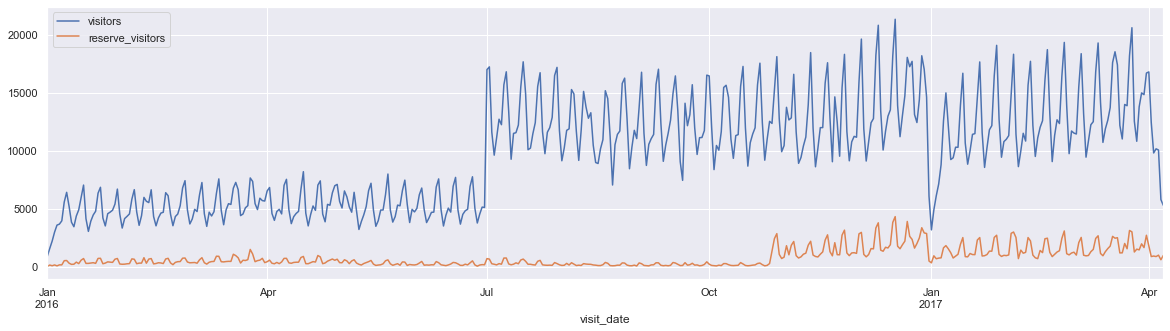

In [99]:
train_data.groupby('visit_date').sum()[['visitors','reserve_visitors']].plot(figsize=(20,5))
plt.show()

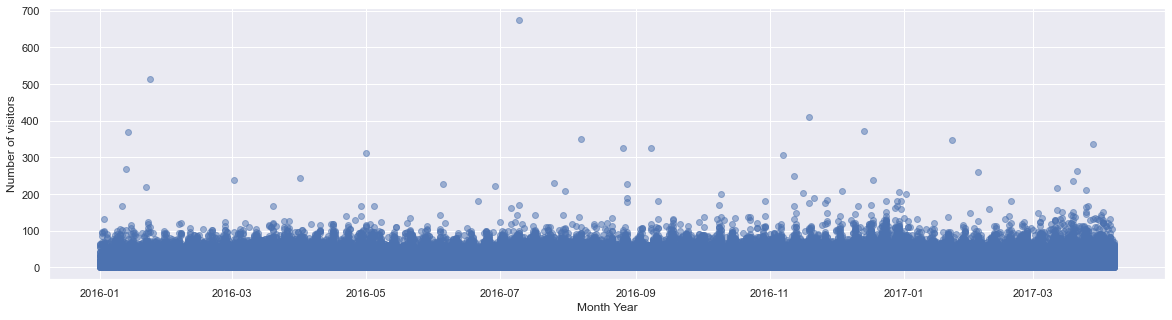

In [100]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(train_data["visit_date"], train_data["visitors"],alpha=0.5)
plt.xlabel("Month Year")
plt.ylabel("Number of visitors")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


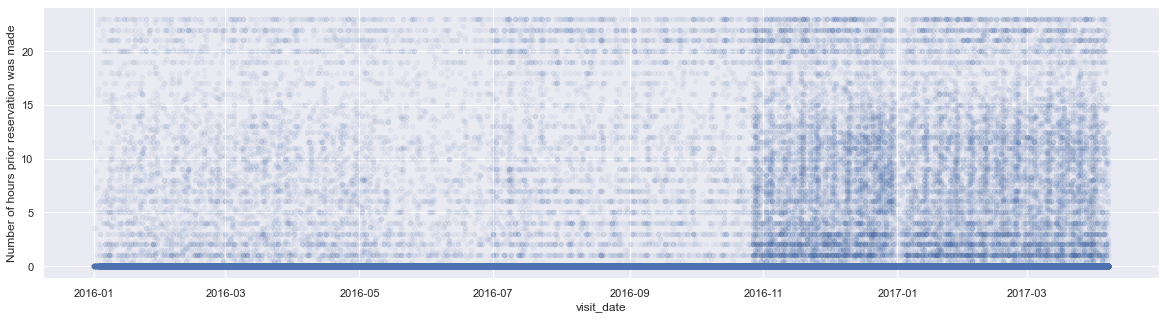

In [101]:
train_data[['visit_date','Time_Difference']].plot(x='visit_date',y='Time_Difference', figsize=(20,5),kind='scatter',alpha = 0.05)
plt.ylabel("Number of hours prior reservation was made")
plt.show()

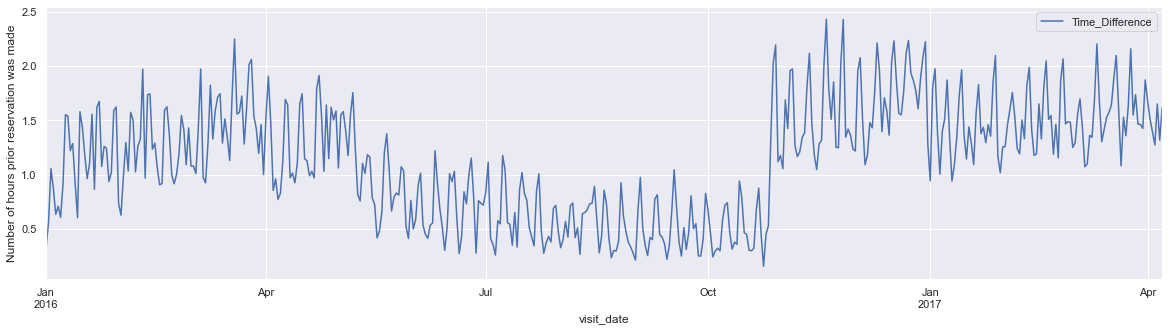

In [102]:
temp =train_data[['visit_date','Time_Difference']].groupby('visit_date').mean().reset_index()
temp.plot(x='visit_date',y='Time_Difference', figsize=(20,5),kind='line')
plt.ylabel("Number of hours prior reservation was made")
plt.show()

In [103]:
train_data

,chw_store_id,visit_date,visitors,chw_genre_name,chw_area_name,city,ward,neighborhood,reserve_visitors,Time_Difference,visit_time,reserve_time,visit_year,visit_month,visit_weekday,holiday_flg
0,air_3561fd1c0bce6a95,2016-08-25,8,Italian/French,Tōkyō-to Ōta-ku Kamiikedai,Tōkyō-to,Ōta-ku,Kamiikedai,0.00,0.00,0.00,0.00,2016,8,3,0
1,air_26c5bbeb7bb82bf1,2017-01-11,9,Cafe/Sweets,Tōkyō-to Kita-ku Ōjihonchō,Tōkyō-to,Kita-ku,Ōjihonchō,0.00,0.00,0.00,0.00,2017,1,2,0
2,air_c1ff20617c54fee7,2016-08-10,13,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,Tōkyō-to,Meguro-ku,Kamimeguro,0.00,0.00,0.00,0.00,2016,8,2,0
3,air_310e467e6e625004,2017-03-10,17,Italian/French,Tōkyō-to Chūō-ku Tsukiji,Tōkyō-to,Chūō-ku,Tsukiji,0.00,0.00,0.00,0.00,2017,3,4,0
4,air_671b4bea84dafb67,2016-06-01,34,Japanese food,Tōkyō-to Minato-ku Shibakōen,Tōkyō-to,Minato-ku,Shibakōen,0.00,0.00,0.00,0.00,2016,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215700,air_e053c561f32acc28,2016-07-20,27,Izakaya,Hokkaidō Asahikawa-shi 6 Jōdōri,Hokkaidō,Asahikawa-shi,6,0.00,0.00,0.00,0.00,2016,7,2,0
215701,air_74cf22153214064c,2016-12-06,3,Cafe/Sweets,Hyōgo-ken Takarazuka-shi Tōyōchō,Hyōgo-ken,Takarazuka-shi,Tōyōchō,0.00,0.00,0.00,0.00,2016,12,1,0
215702,air_287d2de7d3c93406,2016-12-20,24,Bar/Cocktail,Tōkyō-to Toshima-ku Minamiikebukuro,Tōkyō-to,Toshima-ku,Minamiikebukuro,0.00,0.00,0.00,0.00,2016,12,1,0
215703,air_2570ccb93badde68,2016-07-06,28,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,Tōkyō-to,Shinjuku-ku,Kabukichō,0.00,0.00,0.00,0.00,2016,7,2,0


Text(0, 0.5, 'Mean visitors / Hours')

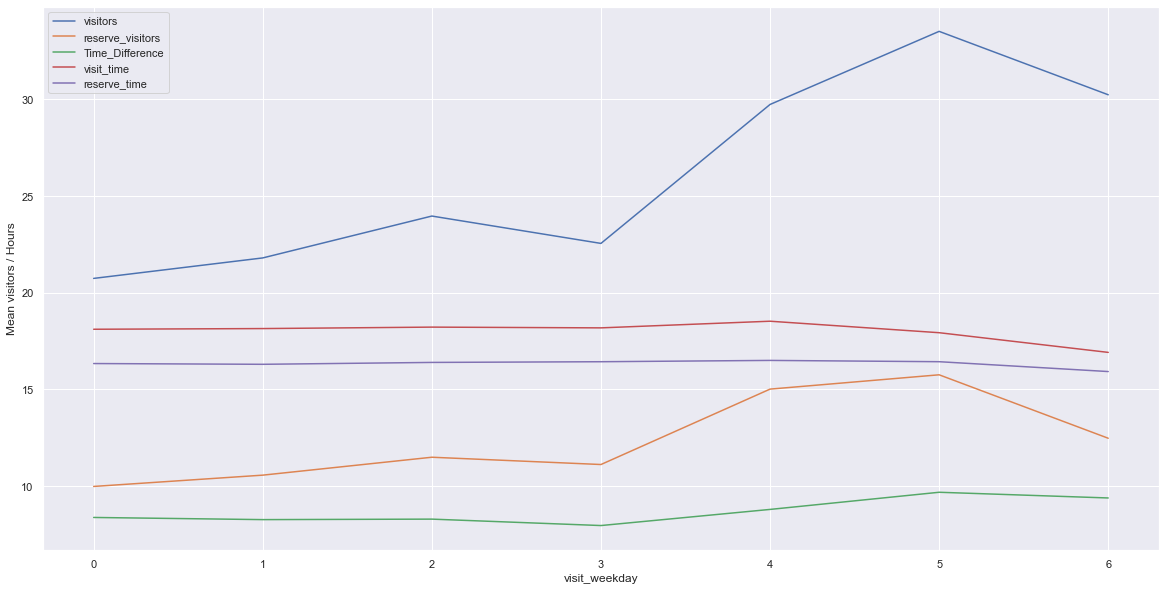

In [104]:
train_data[(train_data.reserve_visitors > 0)].groupby(['visit_weekday']).mean().plot(figsize=(20,10))
plt.ylabel("Mean visitors / Hours")

Text(0, 0.5, 'Mean visitors / Hours')

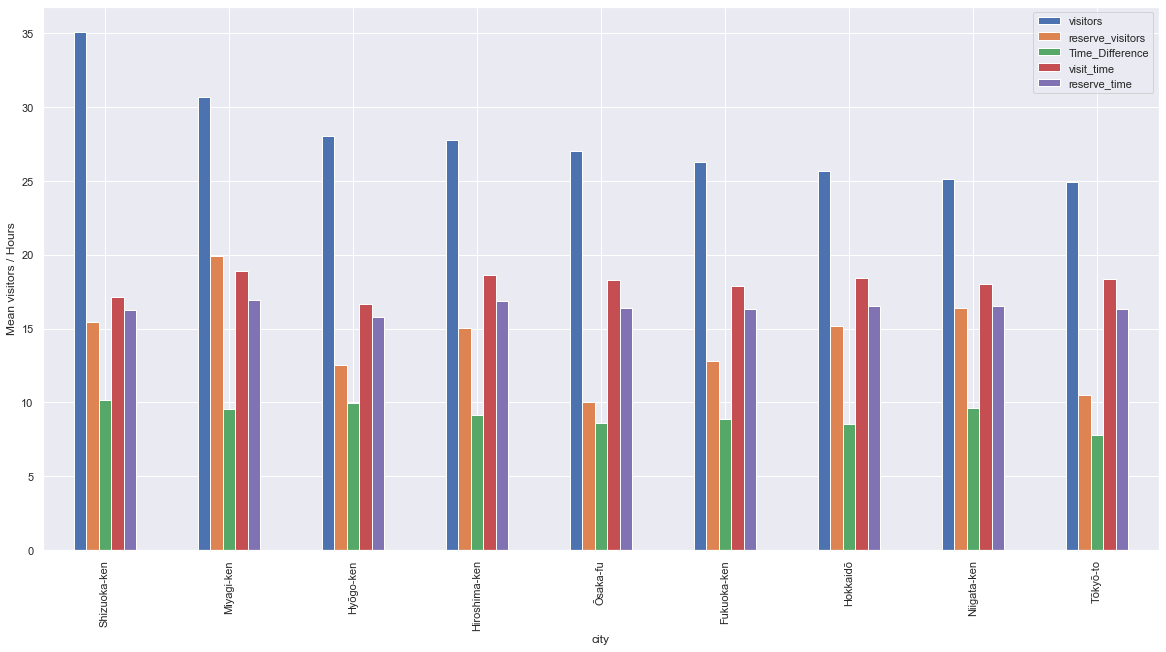

In [105]:
train_data[(train_data.reserve_visitors > 0)].groupby(['city']).mean().sort_values(by='visitors',ascending=False).plot(figsize=(20,10),kind='bar')
plt.ylabel("Mean visitors / Hours")

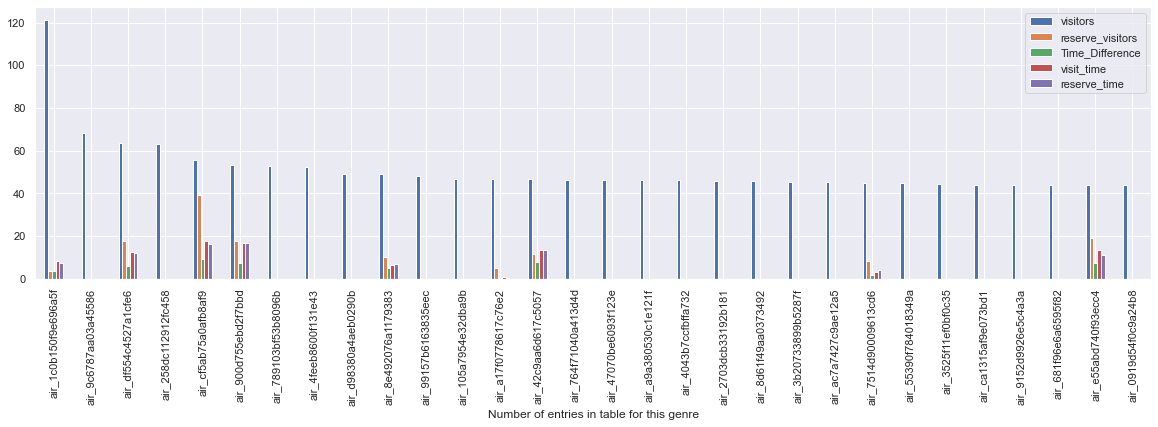

In [106]:
temp = train_data.groupby('chw_store_id').mean()
temp.sort_values(by='visitors',ascending=False)[:30].plot(kind='bar',figsize=(20,5))
plt.xlabel("Number of entries in table for this genre")
plt.show()

In [107]:
temp = train_data.groupby('chw_store_id').mean()
top10 = temp.sort_values(by='visitors',ascending=False)[:10]
top10

,visitors,reserve_visitors,Time_Difference,visit_time,reserve_time
chw_store_id,,,,,
air_1c0b150f9e696a5f,121.24,3.91,3.69,8.23,7.20
air_9c6787aa03a45586,68.52,0.00,0.00,0.00,0.00
air_df554c4527a1cfe6,63.67,17.92,5.88,12.81,12.27
air_258dc112912fc458,63.15,0.00,0.00,0.00,0.00
air_cf5ab75a0afb8af9,55.68,39.29,9.41,17.97,16.13
air_900d755ebd2f7bbd,53.20,17.60,7.60,16.71,16.65
air_789103bf53b8096b,52.90,0.00,0.00,0.00,0.00
air_4feeb8600f131e43,52.48,0.00,0.00,0.00,0.00
air_d98380a4aeb0290b,49.01,0.00,0.00,0.00,0.00


In [108]:
top10 = ['air_1c0b150f9e696a5f','air_9c6787aa03a45586','air_258dc112912fc458','air_df554c4527a1cfe6','air_cf5ab75a0afb8af9', 'air_789103bf53b8096b','air_789103bf53b8096b','air_900d755ebd2f7bbd','air_4feeb8600f131e43','air_d98380a4aeb0290b','air_99157b6163835eec']

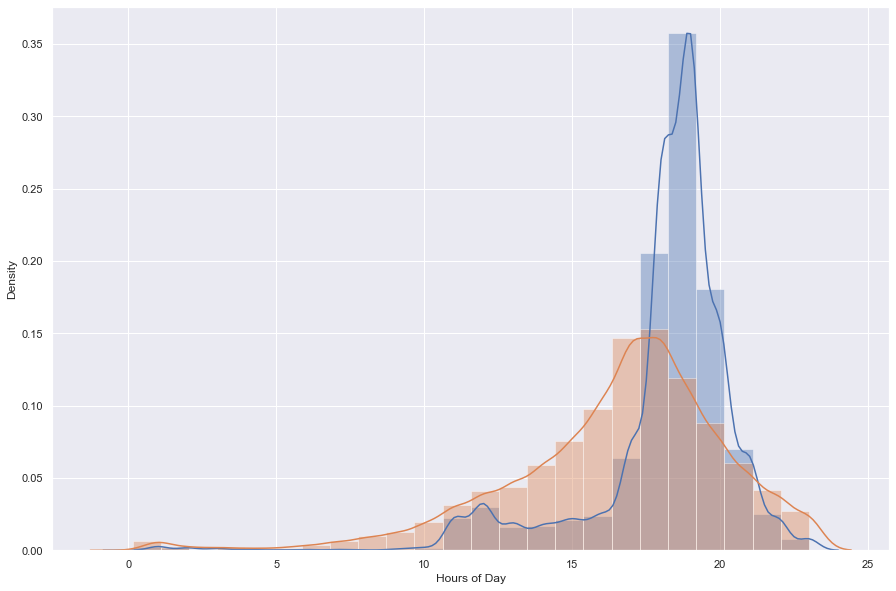

In [109]:
plt.figure(figsize=(15,10))
sns.distplot(train_data[train_data.visit_time > 0].visit_time,bins=24)
sns.distplot(train_data[train_data.reserve_time > 0].reserve_time,bins=24)
plt.xlabel("Hours of Day")
plt.show()

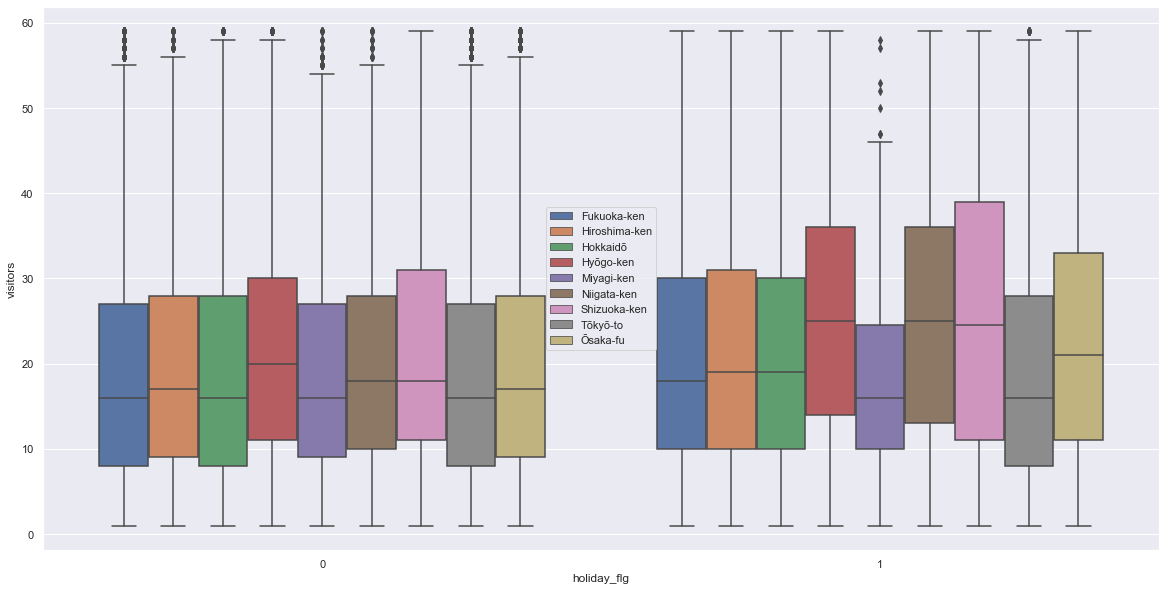

In [110]:
plt.figure(figsize=(20,10))
sns.boxplot(x='holiday_flg', y='visitors', data=train_data[(train_data.visitors<60)],hue='city')
plt.legend(loc='center')
plt.show()

### All important points that were inferred from above plots are listed in Project report pdf in detail. 

# MODEL SELECTION

In [111]:
#Importing CSV Files
chw_reserve = pd.read_csv('Data/come-visit-again-iiitb/chw_reserve.csv',parse_dates=['visit_datetime', 'reserve_datetime'])
chw_store_info = pd.read_csv('Data/come-visit-again-iiitb/chw_store_info.csv')
store_id_relation = pd.read_csv('Data/come-visit-again-iiitb/store_id_relation.csv')
date_info = pd.read_csv('Data/come-visit-again-iiitb/date_info.csv',parse_dates=['calendar_date'])
train = pd.read_csv('Data/come-visit-again-iiitb/train.csv',parse_dates=['visit_date'])

In [112]:
#dropping the day of week column as we would already extract it from datetime value.
date_info.drop(columns=['day_of_week'],inplace=True)

#renaming date column so that it will be useful while merging the holiday flag with training data.
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)

In [113]:
#preparing final training dataset by merging relevant features to the train data.
train_data = train.merge(chw_store_info, how='left', on='chw_store_id')

#Extracting year month weekday as new features
train_data["visit_year"] = pd.DatetimeIndex(train_data['visit_date']).year
train_data["visit_month"] = pd.DatetimeIndex(train_data['visit_date']).month
train_data["visit_weekday"] = pd.DatetimeIndex(train_data['visit_date']).weekday

#Extracting city ward neighbourhood as new features
train_data['city'] = train_data['chw_area_name'].str.split().str[0]
train_data['ward'] = train_data['chw_area_name'].str.split().str[1]
train_data['neighborhood'] = train_data['chw_area_name'].str.split().str[2]

#Add holiday flag from date info table
train_data = train_data.merge(date_info,how='left',on='visit_date')

#Making all object type columns as categorical columns.
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].astype('category')
        
#Implementing labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in ['city','ward','neighborhood','holiday_flg','chw_genre_name','chw_area_name']:
    train_data[feature] = le.fit_transform(train_data[feature].astype(str))

    
# #Implementing OneHotEncoding using get dummies method
train_data = pd.concat([train_data,pd.get_dummies(train_data['holiday_flg'], prefix='holiday_flg')],axis=1)
train_data.drop(['holiday_flg'],axis=1, inplace=True)     

In [114]:
train_data.columns

Index(['chw_store_id', 'visit_date', 'visitors', 'chw_genre_name',
       'chw_area_name', 'latitude', 'longitude', 'visit_year', 'visit_month',
       'visit_weekday', 'city', 'ward', 'neighborhood', 'holiday_flg_0',
       'holiday_flg_1'],
      dtype='object')

In [115]:
#Adding mean median and min max visitors column grouped by air store id and weekday
group_by_cols = ['chw_store_id','visit_weekday']
visitor_stats = train_data\
                .groupby(group_by_cols)\
                ['visitors']\
                .agg(['mean', 'median', 'min','max'])\
                .rename(columns=lambda colname: str(colname)+'_visitors')\
                .reset_index()

In [116]:
visitor_stats

,chw_store_id,visit_weekday,mean_visitors,median_visitors,min_visitors,max_visitors
0,air_00a91d42b08b08d9,0,22.56,19.50,1.00,47.00
1,air_00a91d42b08b08d9,1,23.54,24.00,1.00,41.00
2,air_00a91d42b08b08d9,2,28.00,27.00,15.00,52.00
3,air_00a91d42b08b08d9,3,29.30,29.00,15.00,47.00
4,air_00a91d42b08b08d9,4,37.35,36.50,26.00,57.00
...,...,...,...,...,...,...
5798,air_fff68b929994bfbd,2,4.40,4.00,1.00,12.00
5799,air_fff68b929994bfbd,3,4.92,5.00,1.00,12.00
5800,air_fff68b929994bfbd,4,5.42,5.00,1.00,17.00
5801,air_fff68b929994bfbd,5,7.46,7.00,2.00,18.00


In [117]:
train_data = train_data.merge(visitor_stats,how='left',on=group_by_cols)

In [118]:
train_data.head()

,chw_store_id,visit_date,visitors,chw_genre_name,chw_area_name,latitude,longitude,visit_year,visit_month,visit_weekday,city,ward,neighborhood,holiday_flg_0,holiday_flg_1,mean_visitors,median_visitors,min_visitors,max_visitors
0,air_3561fd1c0bce6a95,2016-08-25,8,6,90,35.60,139.70,2016,8,3,7,54,34,1,0,8.14,7.00,1.00,23.00
1,air_26c5bbeb7bb82bf1,2017-01-11,9,2,51,35.75,139.73,2017,1,2,7,21,96,1,0,22.48,21.50,9.00,47.00
2,air_c1ff20617c54fee7,2016-08-10,13,7,58,35.64,139.70,2016,8,2,7,28,35,1,0,7.38,7.00,3.00,13.00
3,air_310e467e6e625004,2017-03-10,17,6,46,35.67,139.77,2017,3,4,7,6,90,1,0,17.85,17.50,7.00,35.00
4,air_671b4bea84dafb67,2016-06-01,34,8,62,35.66,139.75,2016,6,2,7,29,76,1,0,25.18,26.00,8.00,53.00


In [119]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [120]:
#train test split
from sklearn.model_selection import train_test_split
X = train_data.drop(["chw_store_id","visit_date","visitors","chw_area_name","longitude"], axis=1)
y = train_data["visitors"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
X.columns

Index(['chw_genre_name', 'latitude', 'visit_year', 'visit_month',
       'visit_weekday', 'city', 'ward', 'neighborhood', 'holiday_flg_0',
       'holiday_flg_1', 'mean_visitors', 'median_visitors', 'min_visitors',
       'max_visitors'],
      dtype='object')

In [122]:
#Trying simple Linear Regression model

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)
y_preds=lr_model.predict(X_test)
rmsle(y_test, y_preds)

0.5400304376532297

In [123]:
#train test split with test size 0.2
from sklearn.model_selection import train_test_split
X = train_data.drop(["chw_store_id","visit_date","visitors","chw_area_name","longitude"], axis=1)
y = train_data["visitors"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
#Trying KNeighbors Regression model

from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor(n_jobs=-1, n_neighbors=5)
knr_model.fit(X_train, y_train)
y_preds=knr_model.predict(X_test)
rmsle(y_test, y_preds)

0.5523846286953844

In [125]:
#Trying Random Forest Regressor Regression model 

from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor(n_estimators=500, n_jobs=-1, 
                                 max_samples=None)

rfrmodel.fit(X_train, y_train)
y_preds=rfrmodel.predict(X_test)
rmsle(y_test, y_preds)

0.5633276681784335

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215705 entries, 0 to 215704
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   chw_genre_name   215705 non-null  int64  
 1   latitude         215705 non-null  float64
 2   visit_year       215705 non-null  int64  
 3   visit_month      215705 non-null  int64  
 4   visit_weekday    215705 non-null  int64  
 5   city             215705 non-null  int64  
 6   ward             215705 non-null  int64  
 7   neighborhood     215705 non-null  int64  
 8   holiday_flg_0    215705 non-null  uint8  
 9   holiday_flg_1    215705 non-null  uint8  
 10  mean_visitors    215705 non-null  float64
 11  median_visitors  215705 non-null  float64
 12  min_visitors     215705 non-null  float64
 13  max_visitors     215705 non-null  float64
dtypes: float64(5), int64(7), uint8(2)
memory usage: 21.8 MB


# Model Building and Predictions

In [127]:
#Importing CSV Files
chw_reserve = pd.read_csv('Data/come-visit-again-iiitb/chw_reserve.csv',parse_dates=['visit_datetime', 'reserve_datetime'])
chw_store_info = pd.read_csv('Data/come-visit-again-iiitb/chw_store_info.csv')
store_id_relation = pd.read_csv('Data/come-visit-again-iiitb/store_id_relation.csv')
date_info = pd.read_csv('Data/come-visit-again-iiitb/date_info.csv',parse_dates=['calendar_date'])
train = pd.read_csv('Data/come-visit-again-iiitb/train.csv',parse_dates=['visit_date'])
sample_submission = pd.read_csv('Data/come-visit-again-iiitb/sample_submission.csv')

In [128]:
#dropping the day of week column as we would already extract it from datetime value.
date_info.drop(columns=['day_of_week'],inplace=True)

#renaming date column so that it will be useful while merging the holiday flag with training data.
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)

In [129]:
chw_store_info

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.66,139.70
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.06,141.34


In [130]:
date_info

,visit_date,holiday_flg
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,1
3,2016-01-04,0
4,2016-01-05,0
...,...,...
512,2017-05-27,0
513,2017-05-28,0
514,2017-05-29,0
515,2017-05-30,0


In [131]:
train_data

,chw_store_id,visit_date,visitors,chw_genre_name,chw_area_name,latitude,longitude,visit_year,visit_month,visit_weekday,city,ward,neighborhood,holiday_flg_0,holiday_flg_1,mean_visitors,median_visitors,min_visitors,max_visitors
0,air_3561fd1c0bce6a95,2016-08-25,8,6,90,35.60,139.70,2016,8,3,7,54,34,1,0,8.14,7.00,1.00,23.00
1,air_26c5bbeb7bb82bf1,2017-01-11,9,2,51,35.75,139.73,2017,1,2,7,21,96,1,0,22.48,21.50,9.00,47.00
2,air_c1ff20617c54fee7,2016-08-10,13,7,58,35.64,139.70,2016,8,2,7,28,35,1,0,7.38,7.00,3.00,13.00
3,air_310e467e6e625004,2017-03-10,17,6,46,35.67,139.77,2017,3,4,7,6,90,1,0,17.85,17.50,7.00,35.00
4,air_671b4bea84dafb67,2016-06-01,34,8,62,35.66,139.75,2016,6,2,7,29,76,1,0,25.18,26.00,8.00,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215700,air_e053c561f32acc28,2016-07-20,27,7,18,43.77,142.36,2016,7,2,2,3,0,1,0,24.11,24.00,5.00,57.00
215701,air_74cf22153214064c,2016-12-06,3,2,31,34.80,135.36,2016,12,1,3,50,92,1,0,10.25,10.50,1.00,23.00
215702,air_287d2de7d3c93406,2016-12-20,24,1,86,35.72,139.72,2016,12,1,7,51,54,1,0,17.46,15.00,4.00,58.00
215703,air_2570ccb93badde68,2016-07-06,28,7,77,35.69,139.70,2016,7,2,7,44,30,1,0,31.39,30.00,12.00,73.00


In [132]:
#preparing final training dataset by merging relevant features to the train data.
train_data = train.merge(chw_store_info, how='left', on='chw_store_id')

#Extracting year month weekday as new features
train_data["visit_year"] = pd.DatetimeIndex(train_data['visit_date']).year
train_data["visit_month"] = pd.DatetimeIndex(train_data['visit_date']).month
train_data["visit_weekday"] = pd.DatetimeIndex(train_data['visit_date']).weekday

#Extracting city ward neighbourhood as new features
train_data['city'] = train_data['chw_area_name'].str.split().str[0]
train_data['ward'] = train_data['chw_area_name'].str.split().str[1]
train_data['neighborhood'] = train_data['chw_area_name'].str.split().str[2]

#Add holiday flag from date info table
train_data = train_data.merge(date_info,how='left',on='visit_date')

#Making all object type columns as categorical columns.
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].astype('category')
        
#Implementing labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in ['city','ward','neighborhood','holiday_flg','chw_genre_name','chw_area_name']:
    train_data[feature] = le.fit_transform(train_data[feature].astype(str))

    
# #Implementing OneHotEncoding using get dummies method
train_data = pd.concat([train_data,pd.get_dummies(train_data['holiday_flg'], prefix='holiday_flg')],axis=1)
train_data.drop(['holiday_flg'],axis=1, inplace=True)    

In [133]:
#Adding mean median and min max visitors column grouped by air store id and weekday

group_by_cols = ['chw_store_id','visit_weekday']
visitor_stats = train_data\
                .groupby(group_by_cols)\
                ['visitors']\
                .agg(['mean','median', 'min','max'])\
                .rename(columns=lambda colname: str(colname)+'_visitors')\
                .reset_index()

In [134]:
visitor_stats

,chw_store_id,visit_weekday,mean_visitors,median_visitors,min_visitors,max_visitors
0,air_00a91d42b08b08d9,0,22.56,19.50,1.00,47.00
1,air_00a91d42b08b08d9,1,23.54,24.00,1.00,41.00
2,air_00a91d42b08b08d9,2,28.00,27.00,15.00,52.00
3,air_00a91d42b08b08d9,3,29.30,29.00,15.00,47.00
4,air_00a91d42b08b08d9,4,37.35,36.50,26.00,57.00
...,...,...,...,...,...,...
5798,air_fff68b929994bfbd,2,4.40,4.00,1.00,12.00
5799,air_fff68b929994bfbd,3,4.92,5.00,1.00,12.00
5800,air_fff68b929994bfbd,4,5.42,5.00,1.00,17.00
5801,air_fff68b929994bfbd,5,7.46,7.00,2.00,18.00


In [135]:
#Merging the train data with visitor stats
train_data = train_data.merge(visitor_stats,how='left',on=group_by_cols)

In [136]:
#Performing exact same operations, applied on train data, for the sample submission data

sample_submission['chw_store_id'] = sample_submission['id'].str.rsplit('_',1).str[0]
sample_submission['visit_date'] = sample_submission['id'].str.rsplit('_',1).str[1]
sample_submission.visit_date = pd.to_datetime(sample_submission.visit_date)
sample_submission["visit_year"] = pd.DatetimeIndex(sample_submission['visit_date']).year
sample_submission["visit_month"] = pd.DatetimeIndex(sample_submission['visit_date']).month
sample_submission["visit_weekday"] = pd.DatetimeIndex(sample_submission['visit_date']).weekday
sample_submission = sample_submission.merge(chw_store_info, how='left', on='chw_store_id')
sample_submission.drop(columns=['id'],inplace=True)
sample_submission['city'] = sample_submission['chw_area_name'].str.split().str[0]
sample_submission['ward'] = sample_submission['chw_area_name'].str.split().str[1]
sample_submission['neighborhood'] = sample_submission['chw_area_name'].str.split().str[2]
sample_submission = sample_submission.merge(date_info,how='left',on='visit_date')

#Making all object type columns as categorical columns.
for col in sample_submission.columns:
    if sample_submission[col].dtype == 'object':
        sample_submission[col] = sample_submission[col].astype('category')

#Implementing labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in ['city','ward','neighborhood','holiday_flg','chw_genre_name','chw_area_name']:
    sample_submission[feature] = le.fit_transform(sample_submission[feature].astype(str))

sample_submission = pd.concat([sample_submission,pd.get_dummies(sample_submission['holiday_flg'], prefix='holiday_flg')],axis=1)
sample_submission.drop(['holiday_flg'],axis=1, inplace=True)

sample_submission=sample_submission[['chw_store_id', 'visit_date', 'visitors', 'chw_genre_name',
       'chw_area_name','latitude', 'longitude','visit_year', 'visit_month', 'visit_weekday', 'city',
       'ward', 'neighborhood', 'holiday_flg_0', 'holiday_flg_1']]


In [137]:
sample_submission = sample_submission.merge(visitor_stats,how='left',on=group_by_cols)

In [138]:
sample_submission = sample_submission.fillna(train_data.mean())

In [139]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [140]:
#Specifying the training and test data, here test data is our predictions in sample submission.
X_train = train_data.drop(["chw_store_id","visit_date","visitors","chw_area_name","longitude"], axis=1)
Y_train = train_data["visitors"]

X_test = sample_submission.drop(["chw_store_id","visit_date","visitors","chw_area_name","longitude"], axis=1)
y_test = sample_submission["visitors"]

In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215705 entries, 0 to 215704
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   chw_genre_name   215705 non-null  int64  
 1   latitude         215705 non-null  float64
 2   visit_year       215705 non-null  int64  
 3   visit_month      215705 non-null  int64  
 4   visit_weekday    215705 non-null  int64  
 5   city             215705 non-null  int64  
 6   ward             215705 non-null  int64  
 7   neighborhood     215705 non-null  int64  
 8   holiday_flg_0    215705 non-null  uint8  
 9   holiday_flg_1    215705 non-null  uint8  
 10  mean_visitors    215705 non-null  float64
 11  median_visitors  215705 non-null  float64
 12  min_visitors     215705 non-null  float64
 13  max_visitors     215705 non-null  float64
dtypes: float64(5), int64(7), uint8(2)
memory usage: 21.8 MB


In [142]:
X_train.to_csv("./trainx.csv", index=False)
Y_train.to_csv("./trainy.csv", index=False)
X_test.to_csv("./testx.csv", index=False)

In [143]:
X_train = pd.read_csv('./trainx.csv')
Y_train = pd.read_csv('./trainy.csv')
X_test = pd.read_csv('./testx.csv')
y_test = sample_submission["visitors"]

In [144]:
#Modelling Linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_preds_lr=lr_model.predict(X_test)
y_preds_lr

array([[12.25755298],
       [ 7.51886474],
       [24.79651702],
       ...,
       [34.75563842],
       [23.02891828],
       [11.02264348]])

In [145]:
#Modelling KNeighbors regression
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor(n_jobs=-1, n_neighbors=5)
knr_model.fit(X_train, Y_train)
y_preds_knr=knr_model.predict(X_test)
y_preds_knr

array([[13.2],
       [12.2],
       [26.8],
       ...,
       [33.8],
       [24.2],
       [ 7. ]])

In [146]:
#Modelling Random Forest regression
from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor(n_estimators=600, min_samples_leaf=5,
                                 min_samples_split=15,
                                 max_features=1, n_jobs=-1, 
                                 )

rfrmodel.fit(X_train, Y_train)
y_preds_rfr=rfrmodel.predict(X_test)
y_preds_rfr

array([12.63582736,  7.4513905 , 27.71462273, ..., 37.97900845,
       23.58986693,  8.56174242])

In [147]:
y_preds_lr.to_csv("./y_preds_lr.csv", index=False)
y_preds_knr.to_csv("./y_preds_knr.csv", index=False)
y_preds_rfr.to_csv("./y_preds_rfr.csv", index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
final_submission = pd.read_csv('Data/come-visit-again-iiitb/sample_submission.csv')
y_preds_lr = pd.read_csv('Data/come-visit-again-iiitb/y_preds_lr.csv')
y_preds_knr = pd.read_csv('Data/come-visit-again-iiitb/y_preds_knr.csv')
y_preds_rfr = pd.read_csv('Data/come-visit-again-iiitb/y_preds_rfr.csv')


In [ ]:
final_submission['visitors']= y_preds_lr + y_preds_knr + y_preds_rfr

In [ ]:
final_submission

In [ ]:
final_submission['visitors'].mean()

In [ ]:
for i in range( len(final_submission['visitors']) ):
    final_submission['visitors'][i] *= 0.33

In [ ]:
# final_submission['visitors'].mean()

In [ ]:
final_submission.to_csv('prediction_22_RF_KNN_LR.csv', index=False)